# Statistical Modeling

## Introduction

It's time to move beyond statistical tests and into statistical modeling! This is the bridge between basic statistical tests and machine learning.

## Objectives

You will be able to: 

* Identify independent and dependent variables in a statistical model
* Identify parameters in a statistical model
* Describe loss and its importance in relation to model creation
* Describe the relationship between linear regression and other statistical measures

## Statistical Modeling

There are many [formal definitions of statistical modeling](http://www.stat.uchicago.edu/~pmcc/pubs/AOS023.pdf), but the key element to understand is that statistical modeling uses data along with statistics to provide a framework for understanding data relationships.

First you construct a ***model***, then you can assess the quality of the model and use it to make claims about the data. In particular, we'll be focused on an ***inferential*** model-building process, which means we are looking for a better understanding of how the variables of the model relate to each other. (The other main form of model-building is *predictive*, which focuses more on making predictions about unseen data.)

## Independent and Dependent Variables

One of the first steps in building a model is setting up the ***independent and dependent variables***. In models, the independent variable(s) are the variables that will affect (or will lead to a change in) the dependent variable(s).

* Independent variables are also known as: predictor variables, input variables, explanatory variables, features
* Dependent variables are also known as: outcome variables, target variables, response variables

### Identifying Independent and Dependent Variables

Some kinds of data will only ever make sense as independent variables. This includes anything that cannot be controlled directly, e.g. time of day in a given place. While the time of day might cause some other variable to change, another variable is not going to change the time of day.

In other cases, you might have multiple possible dependent variables and multiple possible independent variables.

You will need to use your ***data understanding*** to establish what makes the most sense as the independent vs. dependent variables for your particular dataset. Given your understanding of the situation, what variable(s) might be associated with an increase or decrease in what other variable(s)?

### Plotting Independent and Dependent Variables

Independent and dependent variables are normally shown on a graph under a standardized approach. This makes it easy for you to quickly see which variable is independent and which is dependent when looking at a graph or chart. 

Conventionally, the independent variable goes on the x-axis, or the horizontal axis. Let's consider another example, one where we look at someone's income depending on their age. Below, you see a scatter plot where age is the independent variable, and income is the dependent variable. In this setting, we want to study if age has some effect on annual income.

<img  src ="https://github.com/learn-co-curriculum/dsc-statistical-modeling/raw/master/images/scatter_age_income.png" width="500">

## Our First Statistical Model

A statistical model can be thought of as some kind of a transformation that helps us express dependent variables as a function of one or more independent variables.

A statistical model defines a ***relationship*** between a dependent and an independent variable.

For the plot we see above, the relationship between age and income can be shown using a **straight line** connecting all the individual observations in the data. So this line here would be our **model** as shown in the image below. 

<img src="https://github.com/learn-co-curriculum/dsc-statistical-modeling/raw/master/images/scatter_line_age_income.png" width="600"> 

We can define and **fit** such a straight line to our data following a straight line equation: 

$$y = m  x + c$$ 

You'll often come across Greek letters talking about models like this. Another common way of writing a linear equation is ($\beta$ is the Greek letter "beta"):

$$y = \beta_0 + \beta_1  x $$ 

$\beta_0$ has the same role as $c$ in the first expression and denotes the _intercept with the y-axis_.
$\beta_1$ has the same role as $m$ in the first expression and denotes the _slope of the line_. More on this below. 

Looking at this line above, we can define it as **Income = 1500 + 1000 * Age**, based on slope ($m$ or $\beta_1$) and intercept ($c$ or $\beta_0$) values.

So this is our simple model for the relationship. Of course, we can use more sophisticated models for a better fit, and you may see this later on if you dig into more advanced modeling. This would be our **linear model**, which can help us work out an income value for a given age.

## Statistical Model Parameters

In the example above, where `Income` = 1500 + 1000 * `Age`, we have modeled `Income` as the dependent variable and `Age` as the independent variable.

The other pieces of the equation, 1500 and 1000, are the model ***parameters***. The step of "fitting" a model means finding the best value for these parameters. For linear regression in particular, these parameters are ***coefficients*** and we will use the terms "parameters" and "coefficient" fairly interchangeably.

Depending on the type of analysis you are performing, the parameters themselves may be the most interesting aspect of the model. For example, our model of `Income` seems to indicate a potential causal link between `Age` and higher income, since the coefficient 1000 is positive.

In other cases, the parameters are mainly a tool for making predictions about the dependent variable. Maybe you need to summarize the `Income` for a group of people, but you don't have direct access to that information. If you have access to `Age`, you could use this to make an estimate of `Income` instead.

## Model Loss 

A loss function evaluates how well your model represents the relationship between data variables.

If the model is unable to identify the underlying relationship between the independent and dependent variable(s), the loss function will output a very high number. Consider the age vs. income example above. You can see that the linear model is not exactly touching each data point because these points do not exist in a line. The individual distance of each point from the line is the **loss** that the model exhibits. 

<img src="https://github.com/learn-co-curriculum/dsc-statistical-modeling/raw/master/images/new_loss.png" width="400">

These individual losses, which is essentially the **vertical distance between the individual data points and the line** are taken into account to calculate the overall model loss. 

If the relationship is well modeled, the loss will be low. As we change the parameters of our model to try and improve results, our loss function is our best friend, telling us if we are on the right track. 

You'll learn about loss in further detail in upcoming lessons.

## Linear Regression Connections to Other Statistical Measures

Linear models are closely related to other statistical measures: t-test, Pearson correlation, ANOVA, Chi-square, etc. In fact, you can use a linear regression instead of these tests in many cases! If you're interested in digging deeper, check out [this post](https://www.georgeho.org/tests-as-linear/) from data scientist George Ho.

In this lesson we'll focus specifically on how linear regression is related to t-tests, confidence intervals, and Pearson correlation.

**Do not** focus too much on the code examples here, just look at the overall explanations. We include the code to demonstrate that the numbers are actually the same, but the code should not be the focus.

### Our Linear Regression Example

In the examples below we'll be using the Advertising dataset, using `TV` spending to predict `sales`. 

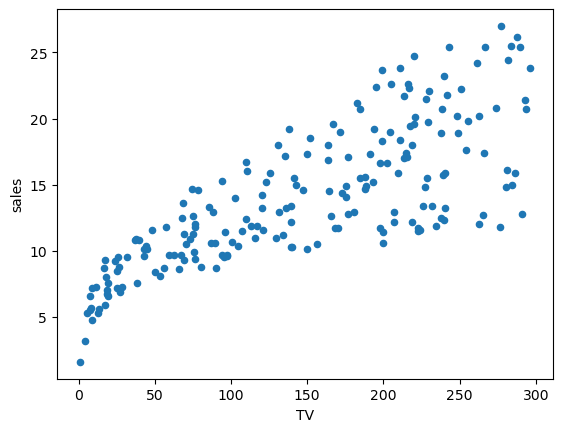

In [1]:
import pandas as pd

data = pd.read_csv("advertising.csv", index_col=0)
data.plot(x="TV", y="sales", kind="scatter");

The code below builds a linear regression model using StatsModels and displays the params (i.e. coefficients).

In [2]:
# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
import statsmodels.api as sm

results = sm.OLS(data["sales"], sm.add_constant(data[["TV"]])).fit()
results.params

const    7.032594
TV       0.047537
dtype: float64

The code above is saying that we have set `TV` (money spent on television advertising) as the independent variable, and `sales` as the dependent variable. And the result of this linear regression model is that we have an intercept of about 7.033 and a `TV` coefficient of about 0.048.

In other words, our regression model is `sales` = 7.033 + 0.048 * `TV`.

Let's plot that line along with the data:

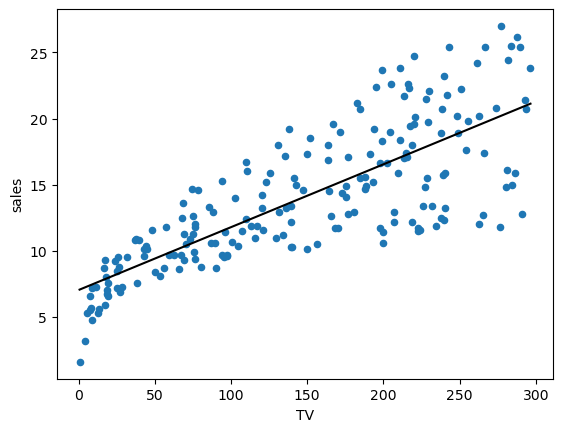

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots();
data.plot(x="TV", y="sales", kind="scatter", ax=ax)

# set up line data representing linear regression model
x = np.linspace(data["TV"].min(), data["TV"].max())
y = x * results.params["TV"] + results.params["const"]

# plot model on the same axes as the data
ax.plot(x, y, color="black");

### Linear Regression and t-Test

Most examples of a t-test that you might have seen are in terms of two different means. For example, the null hypothesis might be that $\mu_1 = \mu_2$ while the alternative hypothesis might be $\mu_1 \neq \mu_2$.

**In the context of linear regression, the t-test that we use is for whether a given _coefficient_ is equal to _zero_.**

The null hypothesis is that $\beta = 0$ and alternative hypothesis is that $\beta \neq 0$.

Luckily, we don't have to perform any additional data manipulation, or import or run any additional functions, to see the results of this t-test. It is just run as part of the linear regression fitting we already did!

We can get the t-test p-values from our linear regression result like this:

In [4]:
results.pvalues

const    1.406300e-35
TV       1.467390e-42
dtype: float64

Compared to a standard alpha of 0.05, these are quite small p-values, which means that there is a statistically significant difference between our coefficients and 0. In other words, both our intercept and our slope are statistically significant.

### Linear Regression and Confidence Intervals

Just like you can use the t-distribution to calculate confidence intervals about a mean, you can also use the t-distribution to calculate confidence intervals for linear regression coefficients.

**In the context of linear regression, we use confidence intervals to express uncertainty about our coefficients.**

In particular, you can call the `conf_int` method to get the 95% confidence interval for the coefficients:

In [5]:
print(results.conf_int())

              0         1
const  6.129719  7.935468
TV     0.042231  0.052843


This means that our 95% confidence interval for `const` (the intercept) is about 6.13 to 7.94, and the 95% confidence interval for the `TV` coefficient is about 0.042 to 0.053.

### Linear Regression, t-Test, and Confidence Intervals: The Bottom Line

Once you have learned how to use linear regression, you are less likely to invoke the SciPy functions for a t-test or confidence interval. However the underlying concepts continue to be important, and will be a component of how you interpret and evaluate your linear regression models.

### Linear Regression vs. Correlation

You might be thinking back to correlation, which is similar to linear regression in that it also describes a relationship between two numeric variables. What is the difference between correlation and linear regression, and why might you use one or the other?

Correlation is a single measurement that describes the strength of the relationship between the variables:

In [6]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data["sales"], data["TV"])
correlation

0.7822244248616066

That first number, 0.78, means that this is a fairly strong, positive correlation. But it does not tell us the change in `sales` that we might expect for a given change in `TV` spending, nor does it give us anything to plot.

How is it related to the linear regression?

First, they have the same p-value (within rounding error difference):

In [7]:
print(p_value) # from pearsonr
print(results.pvalues["TV"])

1.4673897001945964e-42
1.4673897001945922e-42


Second, the correlation is the same as the coefficient if we scale `sales` and `TV` so that they both have a standard deviation of 1:

In [8]:
print(round(correlation, 10))
print(round(results.params["TV"] / data["sales"].std() * data["TV"].std(), 10))

0.7822244249
0.7822244249


However the correlation does not give you an intercept value, or describe the relationship in terms of a model.

### Linear Regression vs. Correlation: The Bottom Line

Correlation and linear regression are very similar calculations. Both are comparing two numeric variables against each other. And in fact, you can calculate correlation from a linear regression coefficient (or vice versa) by scaling the data.

However, linear regression is more interpretable because it produces coefficients that can be used to describe the relationship between the variables. **In general you should use linear regression rather than correlation if you believe that there is a linear association between an independent variable and a dependent variable.**

Unlike with t-tests and confidence intervals, where that knowledge will be incorporated into your linear regression interpretation, most likely you will replace any analysis that previously used correlation with linear regression analysis.

## Summary 

In this lesson, you briefly looked at statistical modeling and its main components. You looked at what a statistical model is and what the model parameters represent. You also got a feel for the differences between independent and dependent variables plus learned about loss and its role in model creation. You looked at all of this in the context of a simple model, a straight line. You also connected this simple model back to the statistical measures used previously.